# 2D Cell Image Segmentation

### by Jason Nie   nie9@illinois.edu

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline


## Watershed

(312, 252, 3)


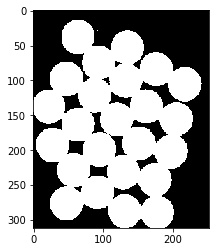

In [6]:
img = cv2.imread('data/coins.jpg')
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

(312, 252)
16.778297233581544
(312, 252)
(312, 252)


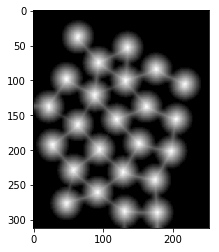

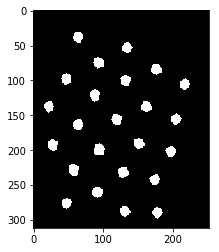

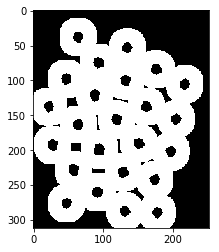

In [7]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

print(dist_transform.shape)
print(ret)
print(sure_fg.shape)
print(unknown.shape)

plt.imshow(dist_transform, cmap='gray')
plt.show()

plt.imshow(sure_fg, cmap='gray')
plt.show()

plt.imshow(unknown, cmap='gray')
plt.show()

(312, 252)


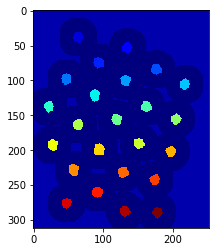

In [8]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

print(markers.shape)
plt.imshow(markers, cmap='jet')
plt.show()


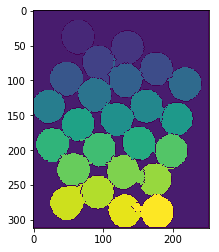

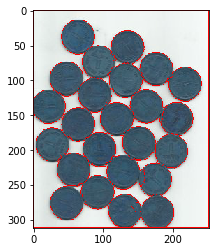

In [9]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()

plt.imshow(img)
plt.show()

## Otsu's Thresholding

(346, 361)
uint8


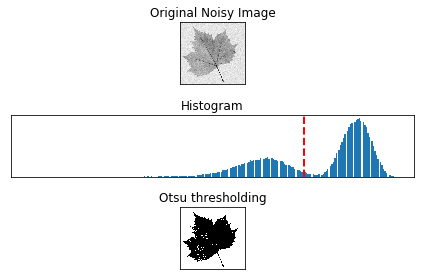

In [15]:
img = cv2.imread('data/noisy_leaf.jpg', 0)
print(img.shape) 
#ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
#blur = cv2.GaussianBlur(img, (5,5), 0)
#ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 

print(img.dtype)
plt.subplot(3,1,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


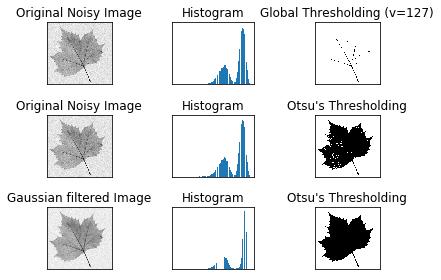

In [14]:
img = cv2.imread('data/noisy_leaf.jpg', 0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## Cell Image

Snap-800-Image Export-81_c3_ORG.tif
Snap-795-Image Export-78_c3_ORG.tif
Snap-799-Image Export-80_c3_ORG.tif
Snap-810-Image Export-85_c3_ORG.tif
Snap-809-Image Export-84_c3_ORG.tif
Snap-808-Image Export-83_c3_ORG.tif
Snap-807-Image Export-82_c3_ORG.tif
(512, 512)


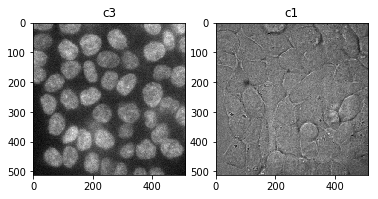

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

dir_path = './data/c3/'
for filename in os.listdir(dir_path):
    print(filename)
    img_path = os.path.join(dir_path, filename)
    img = np.asarray(Image.open(img_path))    # (512, 512)
    
img_path_c3 = './data/c3/Snap-799-Image Export-80_c3_ORG.tif'
img_c3 = np.asarray(Image.open(img_path_c3))
print(img_c3.shape)
plt.subplot(1, 2, 1)
plt.title('c3')
plt.imshow(img_c3, cmap='gray')
#plt.show()

img_path_c1 = './data/c1/Snap-799-Image Export-80_c1_ORG.tif'
img_c1 = np.asarray(Image.open(img_path_c1))
plt.subplot(1, 2, 2)
plt.title('c1')
plt.imshow(img_c1, cmap='gray')
plt.tight_layout
plt.show()

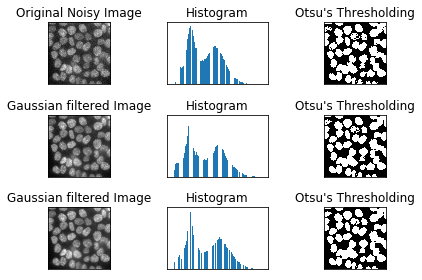

In [7]:
# Otsu's thresholding
ret1,th1 = cv2.threshold(img_c3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur1 = cv2.GaussianBlur(img_c3,(3,3),0)
ret2,th2 = cv2.threshold(blur1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur2 = cv2.GaussianBlur(img_c3,(5,5),0)
blur2 = cv2.normalize(blur2, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
ret3,th3 = cv2.threshold(blur2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img_c3, 0, th1,
          blur1, 0, th2,
          blur2, 0, th3]
titles = ['Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

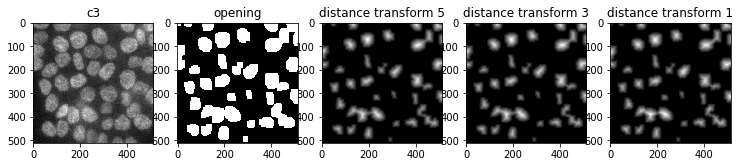

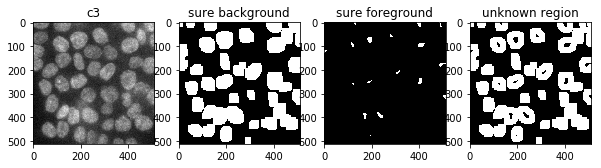

In [8]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations = 10)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform_5 = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
dist_transform_3 = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
dist_transform_1 = cv2.distanceTransform(opening, cv2.DIST_L1, 3)
ret, sure_fg = cv2.threshold(dist_transform_5, 0.7*dist_transform_5.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

fig = plt.figure(figsize=(12.5, 3))
plt.subplot(1,5,1)
plt.imshow(img_c3, cmap='gray')
plt.title('c3')
plt.subplot(1,5,2)
plt.imshow(opening, cmap='gray')
plt.title('opening')
plt.subplot(1,5,3)
plt.imshow(dist_transform_5, cmap='gray')
plt.title('distance transform 5')
plt.subplot(1,5,4)
plt.imshow(dist_transform_3, cmap='gray')
plt.title('distance transform 3')
plt.subplot(1,5,5)
plt.imshow(dist_transform_1, cmap='gray')
plt.title('distance transform 1')
plt.show()

fig = plt.figure(figsize=(10, 3))
plt.subplot(1,4,1)
plt.imshow(img_c3, cmap='gray')
plt.title('c3')
plt.subplot(1,4,2)
plt.imshow(sure_bg, cmap='gray')
plt.title('sure background')
plt.subplot(1,4,3)
plt.imshow(sure_fg, cmap='gray')
plt.title('sure foreground')
plt.subplot(1,4,4)
plt.imshow(unknown, cmap='gray')
plt.title('unknown region')
plt.show()


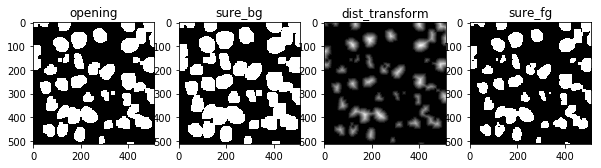

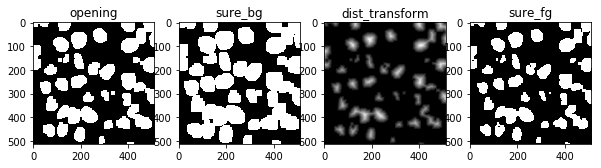

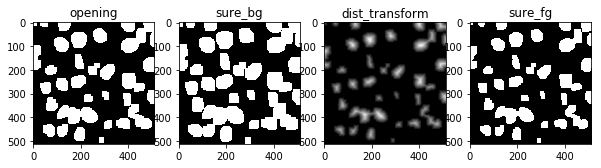

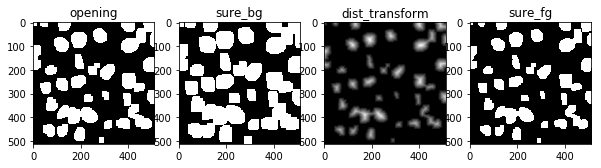

In [9]:
# noise removal
kernel = np.ones((3,3), np.uint8)

opening10 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations = 8)
sure_bg10 = cv2.dilate(opening10, kernel, iterations=3)
dist_transform10 = cv2.distanceTransform(opening10, cv2.DIST_L2, 3)
ret10, sure_fg10 = cv2.threshold(dist_transform10, 0.1*dist_transform10.max(), 255, 0)

fig = plt.figure(figsize=(10, 4))
plt.subplot(1,4,1)
plt.imshow(opening10, cmap='gray')
plt.title('opening')
plt.subplot(1,4,2)
plt.imshow(sure_bg10, cmap='gray')
plt.title('sure_bg')
plt.subplot(1,4,3)
plt.imshow(dist_transform10, cmap='gray')
plt.title('dist_transform')
plt.subplot(1,4,4)
plt.imshow(sure_fg10, cmap='gray')
plt.title('sure_fg')
plt.show()

opening11 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations = 8)
sure_bg11 = cv2.dilate(opening11, kernel, iterations=5)
dist_transform11 = cv2.distanceTransform(opening11, cv2.DIST_L2, 3)
ret11, sure_fg11 = cv2.threshold(dist_transform11, 0.1*dist_transform11.max(), 255, 0)

fig = plt.figure(figsize=(10, 4))
plt.subplot(1,4,1)
plt.imshow(opening11, cmap='gray')
plt.title('opening')
plt.subplot(1,4,2)
plt.imshow(sure_bg11, cmap='gray')
plt.title('sure_bg')
plt.subplot(1,4,3)
plt.imshow(dist_transform11, cmap='gray')
plt.title('dist_transform')
plt.subplot(1,4,4)
plt.imshow(sure_fg11, cmap='gray')
plt.title('sure_fg')
plt.show()

opening12 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations = 10)
sure_bg12 = cv2.dilate(opening12, kernel, iterations=3)
dist_transform12 = cv2.distanceTransform(opening12, cv2.DIST_L2, 3)
ret12, sure_fg12 = cv2.threshold(dist_transform12, 0.1*dist_transform12.max(), 255, 0)

fig = plt.figure(figsize=(10, 4))
plt.subplot(1,4,1)
plt.imshow(opening12, cmap='gray')
plt.title('opening')
plt.subplot(1,4,2)
plt.imshow(sure_bg12, cmap='gray')
plt.title('sure_bg')
plt.subplot(1,4,3)
plt.imshow(dist_transform12, cmap='gray')
plt.title('dist_transform')
plt.subplot(1,4,4)
plt.imshow(sure_fg12, cmap='gray')
plt.title('sure_fg')
plt.show()

opening13 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations = 10)
sure_bg13 = cv2.dilate(opening13, kernel, iterations=5)
dist_transform13 = cv2.distanceTransform(opening13, cv2.DIST_L2, 3)
ret13, sure_fg13 = cv2.threshold(dist_transform13, 0.1*dist_transform13.max(), 255, 0)

fig = plt.figure(figsize=(10, 4))
plt.subplot(1,4,1)
plt.imshow(opening13, cmap='gray')
plt.title('opening')
plt.subplot(1,4,2)
plt.imshow(sure_bg13, cmap='gray')
plt.title('sure_bg')
plt.subplot(1,4,3)
plt.imshow(dist_transform13, cmap='gray')
plt.title('dist_transform')
plt.subplot(1,4,4)
plt.imshow(sure_fg13, cmap='gray')
plt.title('sure_fg')
plt.show()

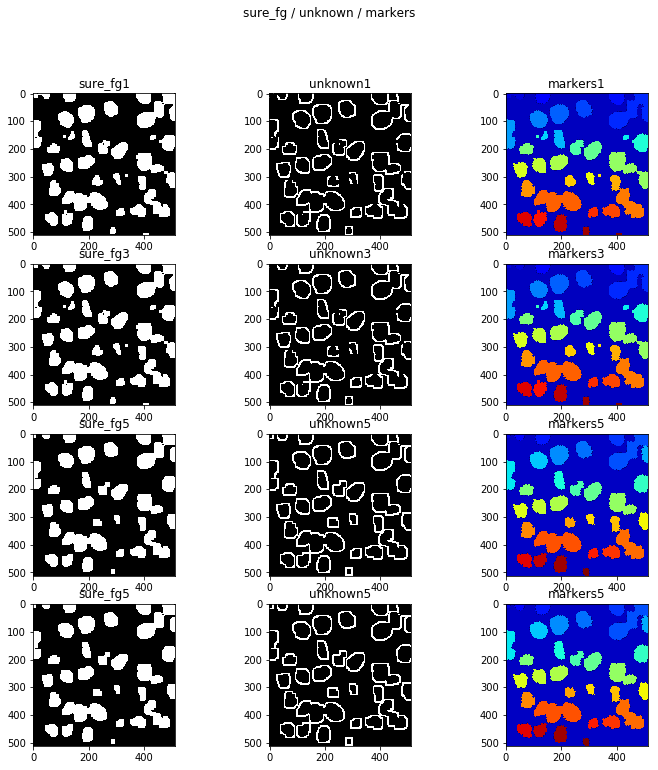

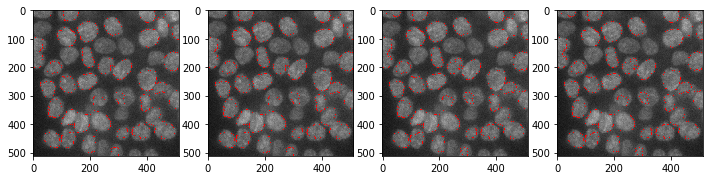

35
35
33
33


In [12]:
sure_fg10 = np.uint8(sure_fg10)
unknown10 = cv2.subtract(sure_bg, sure_fg10)
sure_fg11 = np.uint8(sure_fg11)
unknown11 = cv2.subtract(sure_bg, sure_fg11)
sure_fg12 = np.uint8(sure_fg12)
unknown12 = cv2.subtract(sure_bg, sure_fg12)
sure_fg13 = np.uint8(sure_fg13)
unknown13 = cv2.subtract(sure_bg, sure_fg13)

ret10, markers10 = cv2.connectedComponents(sure_fg10)
markers10 += 1
markers10[unknown10==255] = 0
ret11, markers11 = cv2.connectedComponents(sure_fg11)
markers11 += 1
markers11[unknown11==255] = 0
ret12, markers12 = cv2.connectedComponents(sure_fg12)
markers12 += 1
markers12[unknown12==255] = 0
ret13, markers13 = cv2.connectedComponents(sure_fg13)
markers13 += 1
markers13[unknown13==255] = 0

img_color10 = cv2.cvtColor(img_c3, cv2.COLOR_GRAY2BGR)
markers10 = cv2.watershed(img_color10, markers10)
img_color10[markers10 == -1] = [255,0,0]
img_color11 = cv2.cvtColor(img_c3, cv2.COLOR_GRAY2BGR)
markers11 = cv2.watershed(img_color11, markers11)
img_color11[markers11 == -1] = [255,0,0]
img_color12 = cv2.cvtColor(img_c3, cv2.COLOR_GRAY2BGR)
markers12 = cv2.watershed(img_color12, markers12)
img_color12[markers12 == -1] = [255,0,0]
img_color13 = cv2.cvtColor(img_c3, cv2.COLOR_GRAY2BGR)
markers13 = cv2.watershed(img_color13, markers13)
img_color13[markers13 == -1] = [255,0,0]

fig = plt.figure(figsize=(12,12))
plt.subplot(4,3,1)
plt.suptitle('sure_fg / unknown / markers')
plt.imshow(sure_fg10, cmap='gray')
plt.title('sure_fg1')
plt.subplot(4,3,2)
plt.imshow(unknown10, cmap='gray')
plt.title('unknown1')
plt.subplot(4,3,3)
plt.imshow(markers10, cmap='jet')
plt.title('markers1')

plt.subplot(4,3,4)
plt.imshow(sure_fg11, cmap='gray')
plt.title('sure_fg3')
plt.subplot(4,3,5)
plt.imshow(unknown11, cmap='gray')
plt.title('unknown3')
plt.subplot(4,3,6)
plt.imshow(markers11, cmap='jet')
plt.title('markers3')

plt.subplot(4,3,7)
plt.imshow(sure_fg12, cmap='gray')
plt.title('sure_fg5')
plt.subplot(4,3,8)
plt.imshow(unknown12, cmap='gray')
plt.title('unknown5')
plt.subplot(4,3,9)
plt.imshow(markers12, cmap='jet')
plt.title('markers5')

plt.subplot(4,3,10)
plt.imshow(sure_fg13, cmap='gray')
plt.title('sure_fg5')
plt.subplot(4,3,11)
plt.imshow(unknown13, cmap='gray')
plt.title('unknown5')
plt.subplot(4,3,12)
plt.imshow(markers13, cmap='jet')
plt.title('markers5')
plt.show()


fig = plt.figure(figsize=(12,8))
plt.subplot(1,4,1)
plt.imshow(img_color10, cmap='jet')
plt.subplot(1,4,2)
plt.imshow(img_color11, cmap='jet')
plt.subplot(1,4,3)
plt.imshow(img_color12, cmap='jet')
plt.subplot(1,4,4)
plt.imshow(img_color13, cmap='jet')
plt.show()

print(markers10.max())
print(markers11.max())
print(markers12.max())
print(markers13.max())


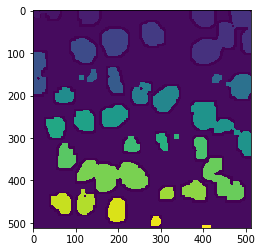

35


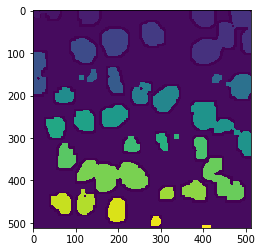

35


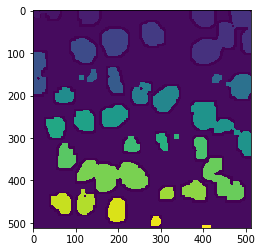

35


In [16]:
ret10, markers10 = cv2.connectedComponents(sure_fg10)
markers10 += 1
markers10[unknown10==255] = 0
plt.imshow(markers10)
plt.show()
print(markers10.max())

ret10, markers10 = cv2.connectedComponents(sure_fg10, 8)
markers10 += 1
markers10[unknown10==255] = 0
plt.imshow(markers10)
plt.show()
print(markers10.max())

ret10, markers10 = cv2.connectedComponents(sure_fg10, 4)
markers10 += 1
markers10[unknown10==255] = 0
plt.imshow(markers10)
plt.show()
print(markers10.max())




17.381397247314453
13.905117797851563
10.428838348388672
6.952558898925782
3.476279449462891
1.7381397247314454


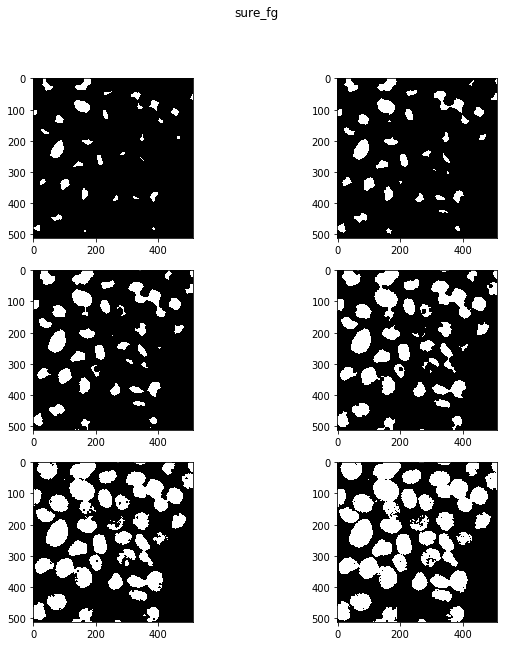

In [32]:
ret1, sure_fg1 = cv2.threshold(dist_transform_5, 0.5*dist_transform_5.max(), 255, 0)
ret2, sure_fg2 = cv2.threshold(dist_transform_5, 0.4*dist_transform_5.max(), 255, 0)
ret3, sure_fg3 = cv2.threshold(dist_transform_5, 0.3*dist_transform_5.max(), 255, 0)
ret4, sure_fg4 = cv2.threshold(dist_transform_5, 0.2*dist_transform_5.max(), 255, 0)
ret5, sure_fg5 = cv2.threshold(dist_transform_5, 0.1*dist_transform_5.max(), 255, 0)
ret6, sure_fg6 = cv2.threshold(dist_transform_5, 0.05*dist_transform_5.max(), 255, 0)

print(ret1)
print(ret2)
print(ret3)
print(ret4)
print(ret5)
print(ret6)

fig = plt.figure(figsize=(10, 10))
plt.suptitle('sure_fg')
plt.subplot(3,2,1)
plt.imshow(sure_fg1, cmap='gray')
plt.subplot(3,2,2)
plt.imshow(sure_fg2, cmap='gray')
plt.subplot(3,2,3)
plt.imshow(sure_fg3, cmap='gray')
plt.subplot(3,2,4)
plt.imshow(sure_fg4, cmap='gray')
plt.subplot(3,2,5)
plt.imshow(sure_fg5, cmap='gray')
plt.subplot(3,2,6)
plt.imshow(sure_fg6, cmap='gray')
plt.show()


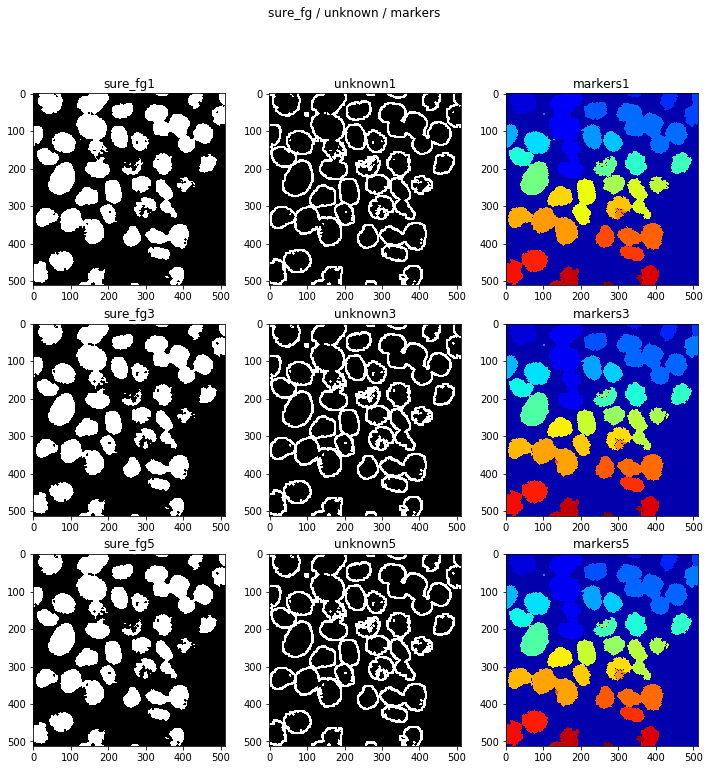

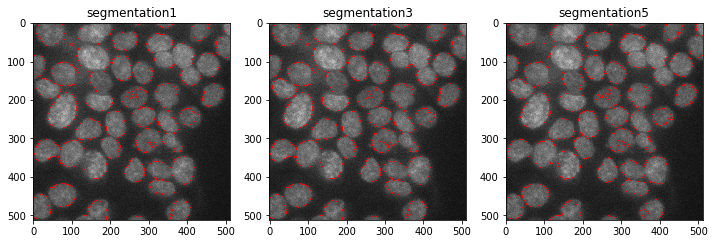

In [33]:
ret7, sure_fg7 = cv2.threshold(dist_transform_1, 0.1*dist_transform_1.max(), 255, 0)
ret8, sure_fg8 = cv2.threshold(dist_transform_3, 0.1*dist_transform_3.max(), 255, 0)
ret9, sure_fg9 = cv2.threshold(dist_transform_5, 0.1*dist_transform_5.max(), 255, 0)

sure_fg7 = np.uint8(sure_fg7)
sure_fg8 = np.uint8(sure_fg8)
sure_fg9 = np.uint8(sure_fg9)
unknown7 = cv2.subtract(sure_bg, sure_fg7)
unknown8 = cv2.subtract(sure_bg, sure_fg8)
unknown9 = cv2.subtract(sure_bg, sure_fg9)

ret7, markers7 = cv2.connectedComponents(sure_fg7)
markers7 = markers7 + 1
markers7[unknown7==255] = 0
ret8, markers8 = cv2.connectedComponents(sure_fg8)
markers8 = markers8 + 1
markers8[unknown8==255] = 0
ret9, markers9 = cv2.connectedComponents(sure_fg9)
markers9 = markers9 + 1
markers9[unknown9==255] = 0

img_color7 = cv2.cvtColor(img_c3,cv2.COLOR_GRAY2BGR)
markers7 = cv2.watershed(img_color7, markers7)
img_color7[markers7 == -1] = [255,0,0]

img_color8 = cv2.cvtColor(img_c3,cv2.COLOR_GRAY2BGR)
markers8 = cv2.watershed(img_color8, markers8)
img_color8[markers8 == -1] = [255,0,0]

img_color9 = cv2.cvtColor(img_c3,cv2.COLOR_GRAY2BGR)
markers9 = cv2.watershed(img_color9, markers9)
img_color9[markers9 == -1] = [255,0,0]

fig = plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.suptitle('sure_fg / unknown / markers')
plt.imshow(sure_fg7, cmap='gray')
plt.title('sure_fg1')
plt.subplot(3,3,2)
plt.imshow(unknown7, cmap='gray')
plt.title('unknown1')
plt.subplot(3,3,3)
plt.imshow(markers7, cmap='jet')
plt.title('markers1')

plt.subplot(3,3,4)
plt.imshow(sure_fg8, cmap='gray')
plt.title('sure_fg3')
plt.subplot(3,3,5)
plt.imshow(unknown8, cmap='gray')
plt.title('unknown3')
plt.subplot(3,3,6)
plt.imshow(markers8, cmap='jet')
plt.title('markers3')

plt.subplot(3,3,7)
plt.imshow(sure_fg9, cmap='gray')
plt.title('sure_fg5')
plt.subplot(3,3,8)
plt.imshow(unknown9, cmap='gray')
plt.title('unknown5')
plt.subplot(3,3,9)
plt.imshow(markers9, cmap='jet')
plt.title('markers5')
plt.show()


fig = plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img_color7, cmap='jet')
plt.title('segmentation1')
plt.subplot(1,3,2)
plt.imshow(img_color8, cmap='jet')
plt.title('segmentation3')
plt.subplot(1,3,3)
plt.imshow(img_color9, cmap='jet')
plt.title('segmentation5')
plt.show()





In [31]:
print(markers7.max())
print(markers8.max())
print(markers9.max())

43
48
41


## Final

int32


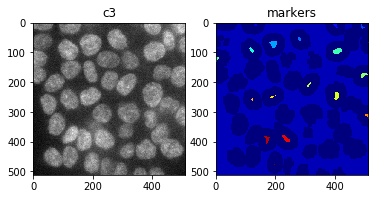

In [9]:
"""
Markers: (512, 512) -1: boundary
                     1: background
                     N: object N
"""

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
print(markers.dtype)

plt.subplot(1,2,1)
plt.imshow(img_c3, cmap='gray')
plt.title('c3')
plt.subplot(1,2,2)
plt.imshow(markers, cmap='jet')
plt.title('markers')
plt.show()

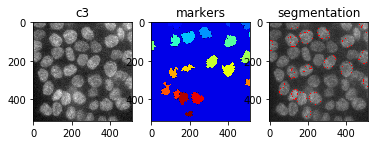

In [36]:
#markers = np.uint8(markers)
img_color = cv2.cvtColor(img_c3,cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(img_color, markers)
img_color[markers == -1] = [255,0,0]

plt.subplot(1,3,1)
plt.imshow(img_c3, cmap='gray')
plt.title('c3')
plt.subplot(1,3,2)
plt.imshow(markers, cmap='jet')
plt.title('markers')
plt.subplot(1,3,3)
plt.imshow(img_color)
plt.title('segmentation')
plt.show()

In [8]:
print(markers[110])

[-1 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  8  8 -1  1  1  1  1 -1  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  6  6  6  6  6  6  6  6  6  6  6
  6 -1  1  1  1  1 -1  6  6 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

## Contour

(512, 512)


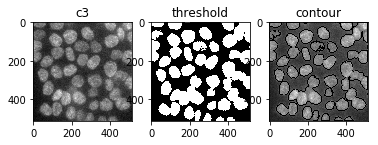

In [62]:
img_path_c3 = './data/c3/Snap-799-Image Export-80_c3_ORG.tif'
img_c3 = np.asarray(Image.open(img_path_c3))
print(img_c3.shape)


blur2 = cv2.GaussianBlur(img_c3,(5,5),0)
blur2 = cv2.normalize(blur2, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
ret3,th3 = cv2.threshold(blur2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

im2, contours, hierarchy = cv2.findContours(th3,
                                            cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
plt.subplot(1, 3, 1)
plt.title('c3')
plt.imshow(img_c3, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('threshold')
plt.imshow(th3, cmap='gray')

cv2.drawContours(img_c3, contours, -1, (0,255,0), 3)
plt.subplot(1, 3, 3)
plt.imshow(img_c3, cmap='gray')
plt.title('contour')
plt.show()